# Neural Network Regression Using Tensorflow

Dataset Used :- [Medical Cost Dataset](https://github.com/stedy/Machine-Learning-with-R-datasets)

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 150

print(f"Tensorflow Version :- {tf.__version__}")
print(f"Pandas Version :- {pd.__version__}")

Tensorflow Version :- 2.10.0
Pandas Version :- 1.5.1


In [2]:
DATASET_LINK = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"

In [3]:
insurance = pd.read_csv(DATASET_LINK)
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
insurance = pd.get_dummies(insurance)

In [17]:
insurance.head().T

,0,1,2,3,4
age,19.000,18.0000,28.000,33.00000,32.0000
bmi,27.900,33.7700,33.000,22.70500,28.8800
children,0.000,1.0000,3.000,0.00000,0.0000
charges,16884.924,1725.5523,4449.462,21984.47061,3866.8552
sex_female,1.000,0.0000,0.000,0.00000,0.0000
sex_male,0.000,1.0000,1.000,1.00000,1.0000
smoker_no,0.000,1.0000,1.000,1.00000,1.0000
smoker_yes,1.000,0.0000,0.000,0.00000,0.0000
region_northeast,0.000,0.0000,0.000,0.00000,0.0000
region_northwest,0.000,0.0000,0.000,1.00000,1.0000


In [20]:
insurance["charges"]

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [21]:
# Create an x and y values

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

In [22]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [23]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [24]:
# Creating training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Building a basic model

In [44]:
# Creating a neural network

insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model.compile(
  optimizer=tf.keras.optimizers.SGD(),
  loss=tf.keras.losses.mae,
  metrics=["mae", "mse"]
)

insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

In [45]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7668.8896 - mae: 7668.8896 - mse: 138725232.0000


[7668.8896484375, 7668.8896484375, 138725232.0]

### Looks like the model is not doing too well. We need to run some experiments
1. Build a bigger model with more layers and hidden units.
2. Train the model for longer

#### Making a bigger model

In [40]:
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_2.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.mae,
  metrics=["mae", "mse"]
)

insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [41]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 5653.4053 - mae: 5653.4053 - mse: 125210496.0000


[5653.4052734375, 5653.4052734375, 125210496.0]

### Training the model for longer

In [46]:
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_3.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.mae,
  metrics=["mae", "mse"]
)

history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [43]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4005.9451 - mae: 4005.9451 - mse: 60449972.0000


[4005.945068359375, 4005.945068359375, 60449972.0]

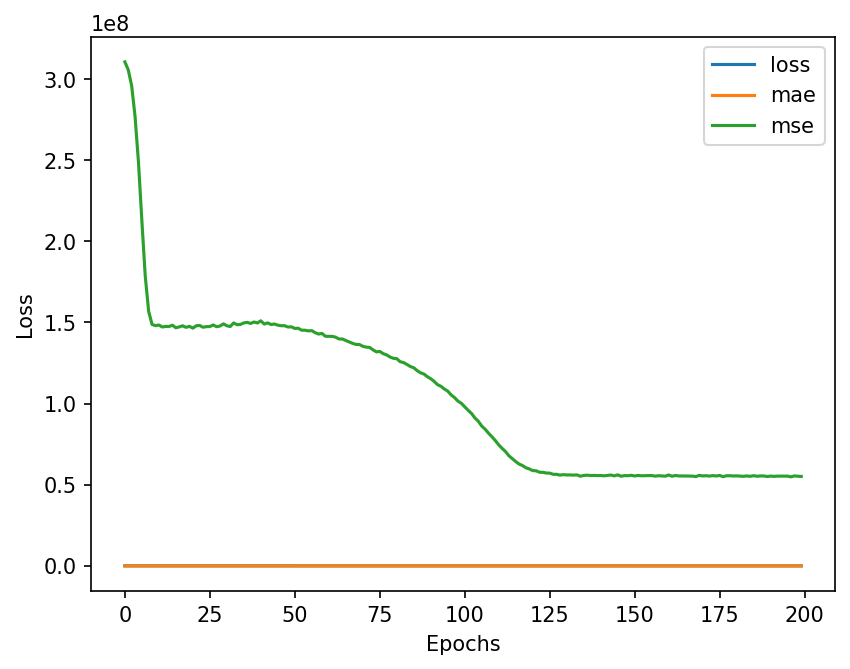

In [50]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

## Pre-Processing The Data (Normalization and Standardization)

We will be scaling values to a common denomination.

In [51]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 150

print(f"Pandas Version :- {pd.__version__}")
print(f"Tensorflow Version :- {tf.__version__}")

Pandas Version :- 1.5.1
Tensorflow Version :- 2.10.0


In [53]:
insurance = pd.read_csv(DATASET_LINK)
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [54]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
  (MinMaxScaler(), ["age", "bmi", "children"]),
  (OneHotEncoder(), ["sex", "smoker", "region"])
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [55]:
X_train_normal

array([[0.23913043, 0.50508425, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.02173913, 0.38088321, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.76086957, 0.3091226 , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.95652174, 0.45816386, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.89130435, 0.31188263, 0.6       , ..., 1.        , 0.        ,
        0.        ],
       [0.34782609, 0.78268449, 0.2       , ..., 0.        , 0.        ,
        1.        ]])

### Making a model for the new normalized data

In [58]:
insurance_model_normal = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_normal.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.mae,
  metrics=["mae", "mse"]
)

history = insurance_model_normal.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [59]:
insurance_model_normal.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3346.5186 - mae: 3346.5186 - mse: 43193392.0000


[3346.5185546875, 3346.5185546875, 43193392.0]

<AxesSubplot: >

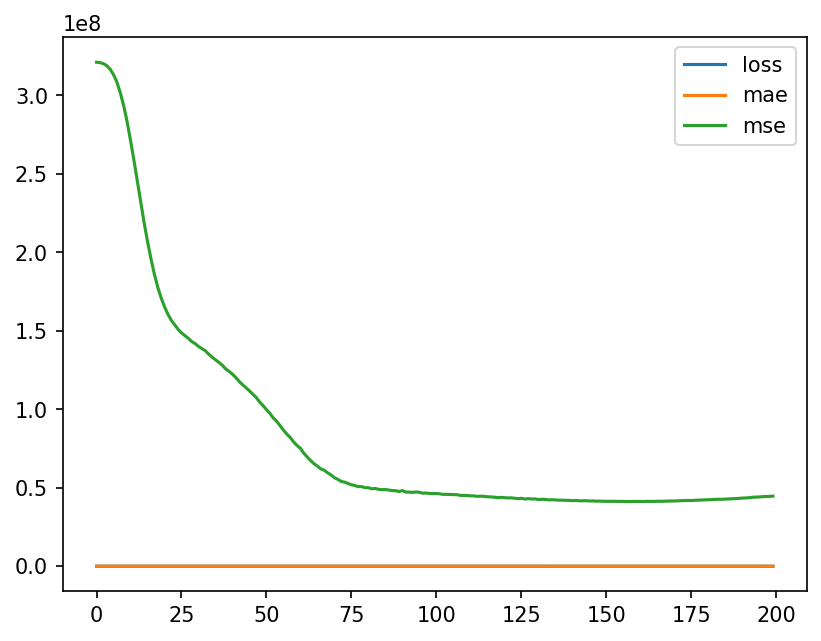

In [60]:
pd.DataFrame(history.history).plot()